In [2]:
import tensorflow as tf
keras = tf.keras
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = [-1, 0, 1, 2, 3, 4]
y = [-3,-1,1,3,5,7]

In [4]:
model = keras.models.Sequential( [
        keras.layers.Dense(units=1, input_shape =[1])
 ])

In [5]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [6]:
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 22.8920
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 18.2907
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 14.6649
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.8067
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5524
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 7.7734
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 6.3685
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 5.2580
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 4.3793
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 3.6829
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 3.1302
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 2.6905
Epoch 13/100
1/1 [==============================

- Export the saved model

In [7]:
tf.saved_model.save(model, './model')

INFO:tensorflow:Assets written to: ./model\assets


INFO:tensorflow:Assets written to: ./model\assets


- convert the model

In [8]:
coverter = tf.lite.TFLiteConverter.from_saved_model('./model')


- Post training quantization

In [10]:
coverter.optimizations = [tf.lite.Optimize.DEFAULT]

In [11]:
tflite_model = coverter.convert()

- save the lite model

In [12]:
tflite_model_file = pathlib.Path('./model/model.tflite')
tflite_model_file.write_bytes(tflite_model)

1084

In [13]:
tflite_model_file = pathlib.Path('./model/quantized.tflite')
tflite_model_file.write_bytes(tflite_model)

1084

- Load the TFlite model

In [14]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

- Get input & output tensors

In [15]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

- point the data to be used for testing and run the interpreter

In [16]:
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

- Visualizing the model

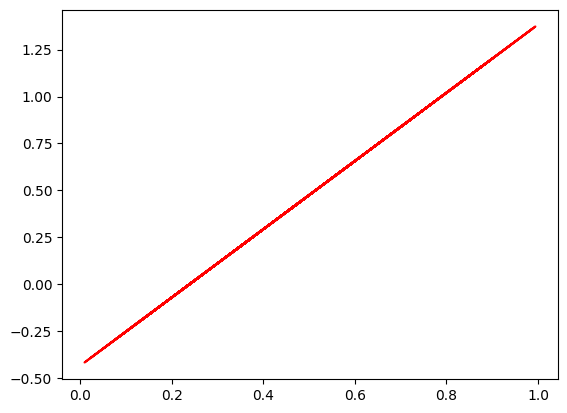

In [17]:
plt.plot(inputs, outputs, 'r')
plt.show()